In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
credit_df = pd.read_csv('credit_risk_dataset.csv')
credit_df.head(20)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [4]:
nulls = credit_df.isnull().sum().sort_values(ascending=False)
nulls

loan_int_rate                 3116
person_emp_length              895
cb_person_cred_hist_length       0
cb_person_default_on_file        0
loan_percent_income              0
loan_status                      0
loan_amnt                        0
loan_grade                       0
loan_intent                      0
person_home_ownership            0
person_income                    0
person_age                       0
dtype: int64

In [13]:
credit_df.shape

(32581, 13)

In [6]:
for value in credit_df['loan_status']:
    credit_df['loan_status'].replace(0,"No Default",inplace=True)
    credit_df['loan_status'].replace(1, "Default", inplace=True)

In [7]:
bins = [0,25,40,55,70]
labels = ['Under 25','25-40','40-55','55-70']
credit_df['Age Group'] = pd.cut(credit_df['person_age'],bins=bins,labels=labels,right=False)

In [8]:
credit_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Age Group
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,Default,0.59,Y,3,Under 25
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,No Default,0.10,N,2,Under 25
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,Default,0.57,N,3,25-40
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,Default,0.53,N,2,Under 25
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,Default,0.55,Y,4,Under 25


In [68]:
credit_df[credit_df['Age Group']== 'Under 25'] 

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Age Group
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,Default,0.59,Y,3,Under 25
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,No Default,0.10,N,2,Under 25
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,Default,0.53,N,2,Under 25
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,Default,0.55,Y,4,Under 25
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,Default,0.25,N,2,Under 25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17823,22,19200,RENT,0.0,DEBTCONSOLIDATION,E,3000,NaN,Default,0.16,Y,2,Under 25
17828,24,48200,RENT,3.0,VENTURE,B,5000,10.38,No Default,0.10,N,3,Under 25
17829,23,117696,MORTGAGE,2.0,MEDICAL,A,15000,6.03,No Default,0.13,N,4,Under 25
17831,24,38000,RENT,0.0,PERSONAL,B,12000,11.89,Default,0.32,N,3,Under 25


In [9]:
#credit_df.sort_values(by='person_age',ascending=True,inplace=True)

In [10]:
credit_df['loan_int_rate'] = credit_df['loan_int_rate'].dropna()
credit_df['person_emp_length'] = credit_df['person_emp_length'].dropna()

In [43]:
total_loans = pd.DataFrame(credit_df['Age Group'].value_counts())
total_loans

,Age Group
25-40,18501
Under 25,12315
40-55,1606
55-70,139


In [71]:
total_under_25 = total_loans.iloc[1, 0]
total_under_25

12315

In [60]:
total_25_40 = total_loans.iloc[0, 0]
total_25_40

18501

In [62]:
total_40_55 = total_loans.iloc[2, 0]
total_40_55

1606

In [63]:
total_55_70 = total_loans.iloc[3, 0]
total_55_70 

139

In [64]:
loan_status = pd.DataFrame(credit_df.groupby(['Age Group','loan_status']).count())
loan_status

person_age  person_income  person_home_ownership  \
Age Group loan_status                                                     
Under 25  Default            2860           2860                   2860   
          No Default         9455           9455                   9455   
25-40     Default            3872           3872                   3872   
          No Default        14629          14629                  14629   
40-55     Default             337            337                    337   
          No Default         1269           1269                   1269   
55-70     Default              37             37                     37   
          No Default          102            102                    102   

                       person_emp_length  loan_intent  loan_grade  loan_amnt  \
Age Group loan_status                                                          
Under 25  Default                   2744         2860        2860       2860   
          No Default                9197         9455        9455       9455   
25-40     Default                   3724         3872        3872       3872   
          No Default               14300        14629       14629      14629   
40-55     Default                    319          337         337        337   
          No Default                1245         1269        1269       1269   
55-70     Default                     37           37          37         37   
          No Default                 101          102         102        102   

                       loan_int_rate  loan_percent_income  \
Age Group loan_status                                       
Under 25  Default               2589                 2860   
          No Default            8533                 9455   
25-40     Default               3543                 3872   
          No Default           13225                14629   
40-55     Default                296                  337   
          No Default            1137                 1269   
55-70     Default                 34                   37   
          No Default              92                  102   

                       cb_person_default_on_file  cb_person_cred_hist_length  
Age Group loan_status                                                         
Under 25  Default                           2860                        2860  
          No Default                        9455                        9455  
25-40     Default                           3872                        3872  
          No Default                       14629                       14629  
40-55     Default                            337                         337  
          No Default                        1269                        1269  
55-70     Default                             37                          37  
          No Default                         102                         102

In [74]:
percent_no_default_under_25 = loan_status.loc['Under 25','No Default'][0]/total_under_25
percent_no_default_under_25

0.7677628907835973

In [81]:
percent_default_under_25 = 1 - percent_no_default_under_25
percent_default_under_25

0.23223710921640273

In [76]:
percent_no_default_25_40 = loan_status.loc['25-40', 'No Default'][0]/total_25_40
percent_no_default_25_40

0.7907140154586239

In [82]:
percent_default_25_40 = 1 - percent_no_default_25_40
percent_default_25_40

0.20928598454137615

In [79]:
percent_default_40_55 = loan_status.loc['40-55', 'No Default'][0]/total_40_55
percent_default_40_55

0.790161892901619

In [80]:
percent_no_default_40_55 = 1 - percent_default_40_55
percent_no_default_40_55

0.20983810709838102

<AxesSubplot:xlabel='count', ylabel='Age Group'>

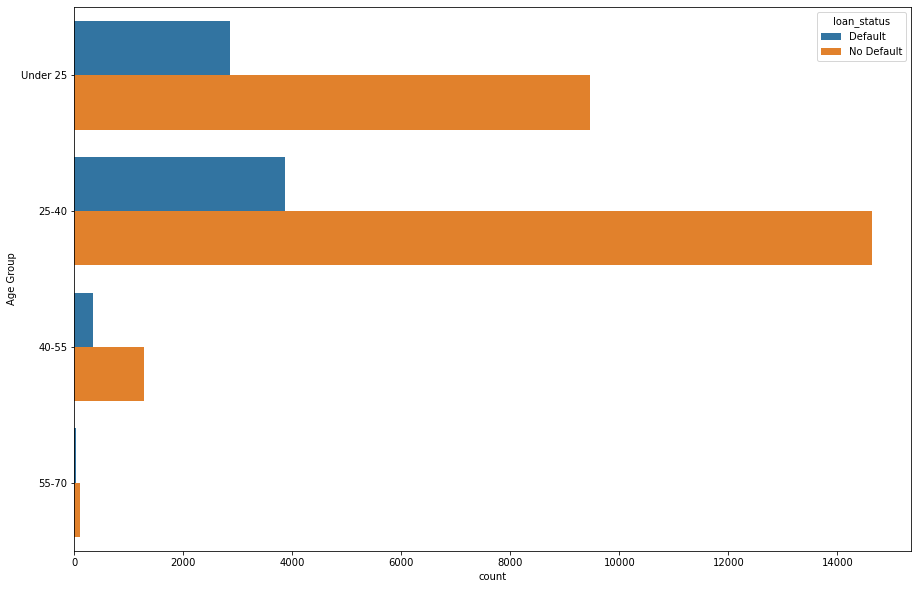

In [10]:
#age_plot = sns.countplot(y='person_age',hue='loan_status', data=credit_df)

fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y = "Age Group", hue='loan_status', ax=ax, data=credit_df)

In [54]:
credit_df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                    object
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

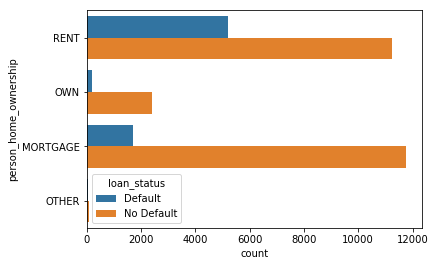

In [10]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y = "person_home_ownership", hue='loan_status', ax=ax, data=credit_df)

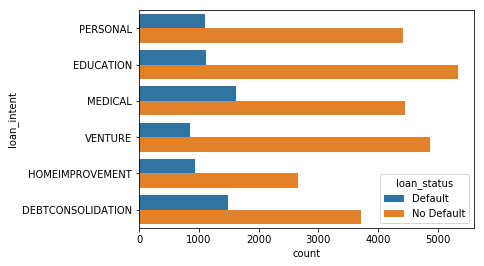

In [20]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y = "loan_intent", hue='loan_status', ax=ax, data=credit_df)

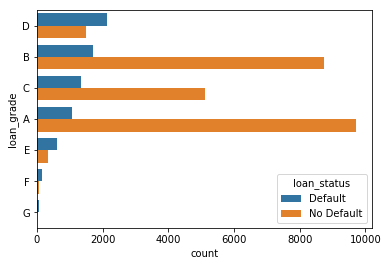

In [21]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y = "loan_grade", hue='loan_status', ax=ax, data=credit_df)

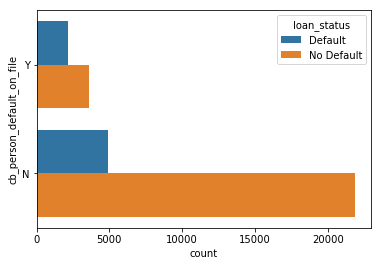

In [35]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y = "cb_person_default_on_file", hue='loan_status', ax=ax, data=credit_df)